In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames[:1]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/lib/kaggle/gcp.py
/kaggle/input/daconfgsd/sample_submission.csv
/kaggle/input/daconfgsd/test/641.png
/kaggle/input/daconfgsd/train/가구수정/11.png
/kaggle/input/daconfgsd/train/터짐/94.png
/kaggle/input/daconfgsd/train/들뜸/48.png
/kaggle/input/daconfgsd/train/피스/48.png
/kaggle/input/daconfgsd/train/창틀,문틀수정/11.png
/kaggle/input/daconfgsd/train/녹오염/11.png
/kaggle/input/daconfgsd/train/석고수정/48.png
/kaggle/input/daconfgsd/train/훼손/1231.png
/kaggle/input/daconfgsd/train/꼬임/173.png
/kaggle/input/daconfgsd/train/울음/11.png
/kaggle/input/daconfgsd/train/걸레받이수정/173.png
/kaggle/input/daconfgsd/train/틈새과다/4.png
/kaggle/input/daconfgsd/train/오염/173.png
/kaggle/input/daconfgsd/train/곰팡이/94.png
/kaggle/input/daconfgsd/train/이음부불량/11.png
/kaggle/input/daconfgsd/train/면불량/94.png
/kaggle/input/daconfgsd/train/반점/1.png
/kaggle/input/daconfgsd/train/오타공/94.png
/kaggle/input/daconfgsd/train/몰딩수정/94.png
/kaggle/input/renewdata/sample_submission.csv
/kaggle/input/renewdata/test/641.png
/kaggle/input/renewda

In [94]:
from PIL import Image
import cv2
import albumentations as A
from tqdm import tqdm
import glob


train = pd.DataFrame({'path':glob.glob('/kaggle/input/renewdata/train/*/*')})
test = pd.read_csv('/kaggle/input/renewdata/test.csv')


In [95]:
train['label'] = train['path'].apply(lambda x : x.split('/')[-2])
train

,path,label
0,/kaggle/input/renewdata/train/가구수정/11.png,가구수정
1,/kaggle/input/renewdata/train/가구수정/4.png,가구수정
2,/kaggle/input/renewdata/train/가구수정/9.png,가구수정
3,/kaggle/input/renewdata/train/가구수정/1.png,가구수정
4,/kaggle/input/renewdata/train/가구수정/2.png,가구수정
...,...,...
3452,/kaggle/input/renewdata/train/몰딩수정/19.png,몰딩수정
3453,/kaggle/input/renewdata/train/몰딩수정/110.png,몰딩수정
3454,/kaggle/input/renewdata/train/몰딩수정/26.png,몰딩수정
3455,/kaggle/input/renewdata/train/몰딩수정/79.png,몰딩수정


## Resizing

In [96]:
os.makedirs('train_300', exist_ok=True)
for path in tqdm(train["path"]):
    image = cv2.imread(path)
    image = cv2.resize(image, dsize=(300, 300), interpolation=cv2.INTER_AREA)
    name = 'train_300/' + path.split("/")[-1]
    cv2.imwrite(name, image)  
    
train['path'] = '/kaggle/working/train_300/' + train['path'].apply(lambda x : x.split('/')[-1])
train

100%|██████████| 3457/3457 [01:11<00:00, 48.14it/s]


,path,label
0,/kaggle/working/train_300/11.png,가구수정
1,/kaggle/working/train_300/4.png,가구수정
2,/kaggle/working/train_300/9.png,가구수정
3,/kaggle/working/train_300/1.png,가구수정
4,/kaggle/working/train_300/2.png,가구수정
...,...,...
3452,/kaggle/working/train_300/19.png,몰딩수정
3453,/kaggle/working/train_300/110.png,몰딩수정
3454,/kaggle/working/train_300/26.png,몰딩수정
3455,/kaggle/working/train_300/79.png,몰딩수정


/kaggle/working/train_300/11.png


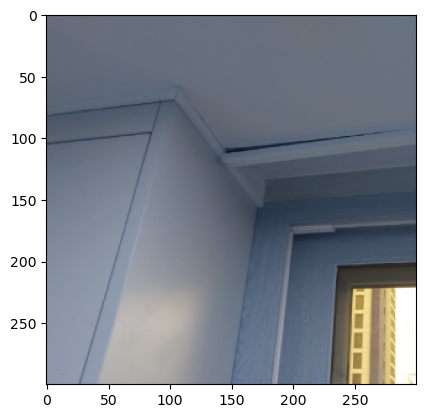

/kaggle/working/train_300/4.png


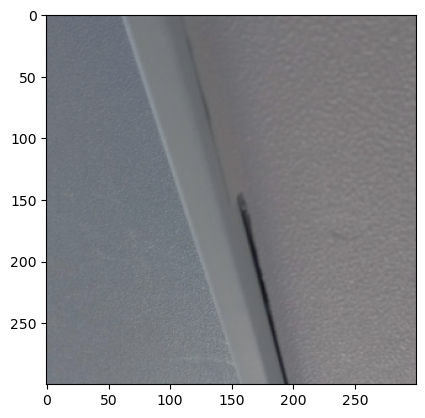

/kaggle/working/train_300/9.png


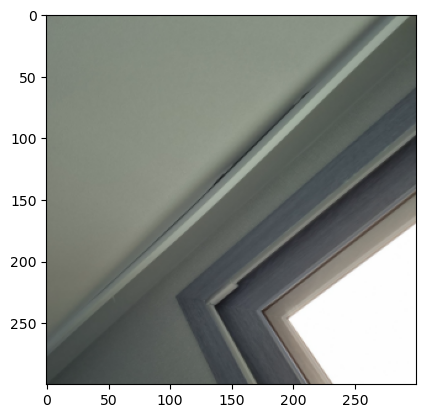

/kaggle/working/train_300/1.png


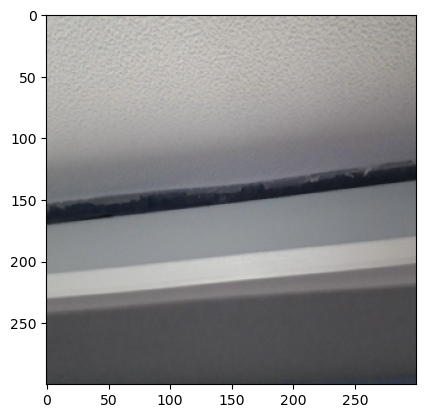

/kaggle/working/train_300/2.png


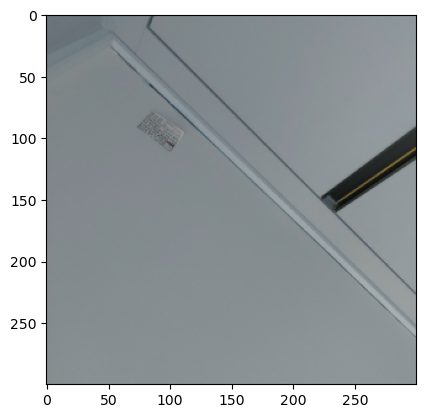

In [97]:
import matplotlib.pyplot as plt
for path in train['path'][:5]:
    img = cv2.imread(path)
    print(path)
    plt.imshow(img)
    plt.show()


In [98]:
test['img_path'] = test['img_path'].apply(lambda x : x[1:])
test['img_path'] = '/kaggle/input/daconfgsd' + test['img_path']
test

,id,img_path
0,TEST_000,/kaggle/input/daconfgsd/test/000.png
1,TEST_001,/kaggle/input/daconfgsd/test/001.png
2,TEST_002,/kaggle/input/daconfgsd/test/002.png
3,TEST_003,/kaggle/input/daconfgsd/test/003.png
4,TEST_004,/kaggle/input/daconfgsd/test/004.png
...,...,...
787,TEST_787,/kaggle/input/daconfgsd/test/787.png
788,TEST_788,/kaggle/input/daconfgsd/test/788.png
789,TEST_789,/kaggle/input/daconfgsd/test/789.png
790,TEST_790,/kaggle/input/daconfgsd/test/790.png


## Image Augmentation
- 석고수정, 들뜸, 피스 &rarr; 2배
- 창틀,문틀수정, 울음, 이음부불량, 녹오염 가구수정 &rarr; 3배
- 틈새과다, 반점 &rarr; 5배
- vertical flip, horizontal flip, rotation, resize (300,300)

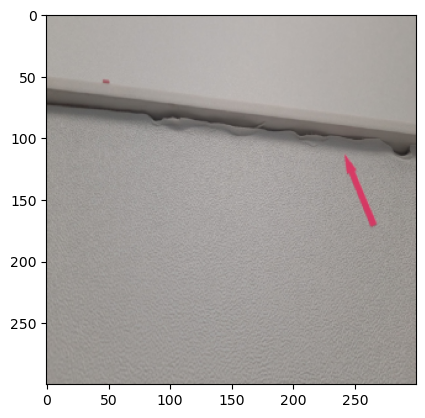

In [109]:
# import shutil
plt.imshow(train_generator.next()[0][0])

# shutil.rmtree('/kaggle/working/train_300_5/')

In [100]:
two_list = ["석고수정", "들뜸" ,'피스']
os.makedirs('train_300_2', exist_ok=True)

for category in two_list:
    for path in tqdm(train[train['label']==category]['path']):
        for i in range(2):
            name = path.split('/')[-1]
            image = cv2.imread(path)
            aug = A.Compose([A.VerticalFlip(), A.Rotate(p=1), A.HorizontalFlip(), A.Resize(300,300)])
            image_aug = aug(image=image)['image']
            cv2.imwrite('train_300_2/' + str(i) + category + name, image_aug)  ### augmentation 2번 시행할 때 'i'로 구분하지 않으면 덮어씌어짐
    
    
three_list = ["창틀,문틀수정","울음","이음부불량","녹오염",'가구수정']
os.makedirs('train_300_3', exist_ok=True)

for category in three_list:
    for path in tqdm(train[train['label']==category]['path']):
        for i in range(3):
            name = path.split('/')[-1]
            image = cv2.imread(path)
            aug = A.Compose([A.VerticalFlip(), A.Rotate(p=1), A.HorizontalFlip(), A.Resize(300,300)])
            image_aug = aug(image=image)['image']
            cv2.imwrite('train_300_3/' + str(i) + category + name, image_aug)
    
    
five_list = ["틈새과다",'반점']
os.makedirs('train_300_5', exist_ok=True)

for category in five_list:
    for path in tqdm(train[train['label']==category]['path']):
        for i in range(5):
            name = path.split('/')[-1]
            image = cv2.imread(path)
            aug = A.Compose([A.VerticalFlip(), A.Rotate(p=1), A.HorizontalFlip(), A.Resize(300,300)])
            image_aug = aug(image=image)['image']
            cv2.imwrite('train_300_5/' + str(i) + category + name, image_aug)

100%|██████████| 3/3 [00:00<00:00, 24.91it/s]


In [101]:
import re

train_aug = pd.DataFrame(
    {'path':glob.glob('/kaggle/working/train_300_2/*') + glob.glob('/kaggle/working/train_300_3/*') + glob.glob('/kaggle/working/train_300_5/*')}
)
train_aug['label'] = train_aug['path'].apply(lambda x: x.split('/')[-1].split('.')[0]).apply(lambda x: re.sub(r"[0-9]","",x))
train_aug

,path,label
0,/kaggle/working/train_300_2/0들뜸28.png,들뜸
1,/kaggle/working/train_300_2/1피스9.png,피스
2,/kaggle/working/train_300_2/1들뜸37.png,들뜸
3,/kaggle/working/train_300_2/1들뜸39.png,들뜸
4,/kaggle/working/train_300_2/0들뜸19.png,들뜸
...,...,...
635,/kaggle/working/train_300_5/4틈새과다2.png,틈새과다
636,/kaggle/working/train_300_5/3반점0.png,반점
637,/kaggle/working/train_300_5/2반점0.png,반점
638,/kaggle/working/train_300_5/4틈새과다1.png,틈새과다


In [102]:
train = pd.concat([train,train_aug], axis=0)  # 중복실행 X
train = train.reset_index().drop(columns='index')
train

,path,label
0,/kaggle/working/train_300/11.png,가구수정
1,/kaggle/working/train_300/4.png,가구수정
2,/kaggle/working/train_300/9.png,가구수정
3,/kaggle/working/train_300/1.png,가구수정
4,/kaggle/working/train_300/2.png,가구수정
...,...,...
4092,/kaggle/working/train_300_5/4틈새과다2.png,틈새과다
4093,/kaggle/working/train_300_5/3반점0.png,반점
4094,/kaggle/working/train_300_5/2반점0.png,반점
4095,/kaggle/working/train_300_5/4틈새과다1.png,틈새과다


## Train & Prediction
- Cross Validation & Ensembling
- Test-Time Augmentation(TTA) : test data를 augmentation하여 추론 &rarr; prediction에 반영

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras.callbacks import *


skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#kf = KFold(n_splits=10, random_state=42,shuffle=True)
result = 0
result2 = 0
for train_idx,valid_idx in skf.split(train,train['label']):
    x_train = train.iloc[train_idx]
    x_valid = train.iloc[valid_idx]
        
    es = EarlyStopping(patience = 3,restore_best_weights=True)
    rl = ReduceLROnPlateau(patience =2,verbose=1)
    
    idg = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True)   ## Test-Time Augmentation (TTA) 수직,수평 뒤집기
    idg2 = ImageDataGenerator(rescale=1./255)
    
    train_generator = idg.flow_from_dataframe(x_train, x_col = 'path',
                                              y_col = 'label',batch_size=32,target_size=(300,300)) # aug Plus
    valid_generator = idg2.flow_from_dataframe(x_valid, x_col = 'path',
                                               y_col = 'label',batch_size=32,target_size=(300,300)) # aug No
    test_generator = idg.flow_from_dataframe(test, x_col = 'img_path',y_col = None, batch_size=32,
                                             class_mode = None, shuffle=False,target_size=(300,300))    
    test_generator2 = idg2.flow_from_dataframe(test, x_col = 'img_path',y_col = None, batch_size=32, 
                                               class_mode = None, shuffle=False,target_size=(300,300))    
    
    # 모델 선언
    model = Sequential()
    model.add(EfficientNetB4(include_top=False, pooling='avg'))
    model.add(Dense(19, activation='softmax'))
    
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='acc')
    model.fit(train_generator, validation_data=valid_generator, epochs=30, callbacks=[es,rl])    
    
    
    # 예측 : TTA 30%, 일반추론 70%씩 반영
    result += model.predict(test_generator)/5 # 30%
    result2 += model.predict(test_generator2)/5 # 70%
    
final_result = 0.3*result + 0.7*result2

In [ ]:
label_dict = {key:val for key,val in zip(train_generator.classes, x_train.label.tolist())}
prediction = np.argmax(final_result,axis=1)
prediction = np.vectorize(label_dict.get)(prediction)
prediction

In [ ]:
sub = pd.read_csv('/kaggle/input/daconfgsd/sample_submission.csv')
sub['label'] = prediction
sub.to_csv('sub.csv', index=False)